In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000101382"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000101382
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,UMB FINANCIAL CORP
Ticker,UMBF


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,23.0,3.648174e+01,8.403783e+00,2.042000e+01,3.081500e+01,3.951000e+01,4.273000e+01,4.792000e+01
interest income,51.0,1.089884e+08,3.429657e+07,6.399300e+07,8.664200e+07,9.337400e+07,1.218505e+08,2.113070e+08
net income,50.0,3.197044e+07,1.650570e+07,1.324100e+07,2.253150e+07,2.805250e+07,3.609125e+07,1.119610e+08
net interest income,52.0,9.209654e+07,3.203138e+07,4.815400e+07,7.586550e+07,8.029700e+07,1.153135e+08,1.638680e+08
provision for loan losses,52.0,1.031612e+07,2.761842e+07,1.000000e+06,3.993250e+06,5.000000e+06,7.550000e+06,2.000170e+08
total revenue,11.0,2.498782e+08,9.285249e+06,2.342420e+08,2.459385e+08,2.477860e+08,2.529130e+08,2.712500e+08


# Plots

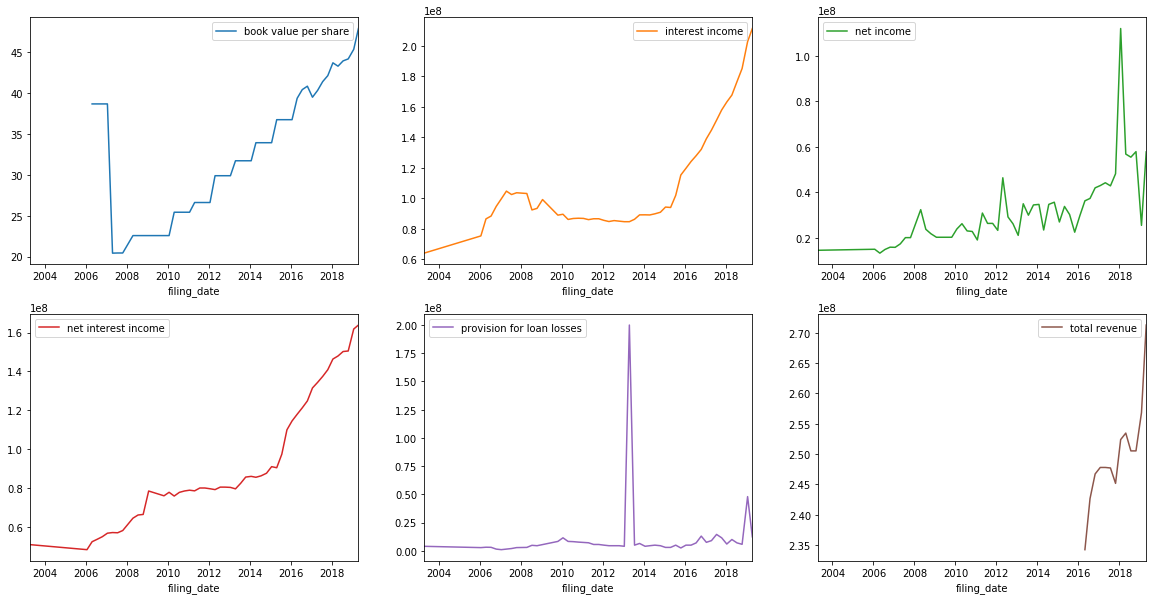

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000101382 book value per share       2003Q1 to 2005Q4: 12 periods  missing   
           book value per share        2006Q2 to 2006Q4: 3 periods  missing   
           book value per share        2007Q3 to 2007Q4: 2 periods  missing   
           book value per share        2008Q2 to 2009Q4: 7 periods  missing   
           book value per share        2010Q2 to 2010Q4: 3 periods  missing   
           book value per share        2011Q2 to 2011Q4: 3 periods  missing   
           book value per share        2012Q2 to 2012Q4: 3 periods  missing   
           book value per share        2013Q2 to 2013Q4: 3 periods  missing   
           book value per share        2014Q2 to 2014Q4: 3 periods  missing   
           book value per share        2015Q2 to 2015Q4: 3 periods  missing   
           interest income            2003Q2 to 2005Q3: 10 periods  missing   
           interest income                                  2007Q4  missing   
           interest income             2009Q1 to 2009Q2: 2 periods  missing   
           interest income                                  2011Q3  missing   
           interest income                                  2013Q1  missing   
           net income                 2003Q2 to 2005Q3: 10 periods  missing   
           net income                  2007Q3 to 2007Q4: 2 periods  missing   
           net income                  2009Q1 to 2009Q3: 3 periods  missing   
           net income                                       2011Q3  missing   
           net interest income        2003Q2 to 2005Q3: 10 periods  missing   
           net interest income                              2007Q4  missing   
           net interest income         2009Q1 to 2009Q2: 2 periods  missing   
           net interest income                              2011Q3  missing   
           provision for loan losses  2003Q2 to 2005Q3: 10 periods  missing   
           provision for loan losses                        2007Q4  missing   
           provision for loan losses   2009Q1 to 2009Q2: 2 periods  missing   
           provision for loan losses                        2011Q3  missing   
           total revenue              2003Q1 to 2015Q4: 52 periods  missing   
           total revenue                                    2017Q1  missing   
           total revenue                                    2018Q3  missing   

                                             message  
cik        item                                       
0000101382 book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           interest income            Missing period  
           interest income            Missing period  
           interest income            Missing period  
           interest income            Missing period  
           interest income            Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing 

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()